## Stanisław Wojciechowski
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vyenn/ML2024/blob/main/homework2.ipynb)

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

# ----------------------------------------------------------------------
# SECTION 1: Generate the "mouse" dataset
# ----------------------------------------------------------------------
np.random.seed(0)  # for reproducibility

# 1) 300 points from N([0, 0], [[0.16, 0],[0, 0.16]])
mean1 = np.array([0.0, 0.0])
cov1 = np.array([[0.16, 0.0],
                 [0.0,  0.16]])
data1 = np.random.multivariate_normal(mean1, cov1, 300)

# 2) 100 points from N([0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean2 = np.array([0.8, 0.8])
cov2 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data2 = np.random.multivariate_normal(mean2, cov2, 100)

# 3) 100 points from N([-0.8, 0.8], [[0.04, 0],[0, 0.04]])
mean3 = np.array([-0.8, 0.8])
cov3 = np.array([[0.04, 0.0],
                 [0.0,  0.04]])
data3 = np.random.multivariate_normal(mean3, cov3, 100)

# Combine all data
data_X = np.vstack([data1, data2, data3])

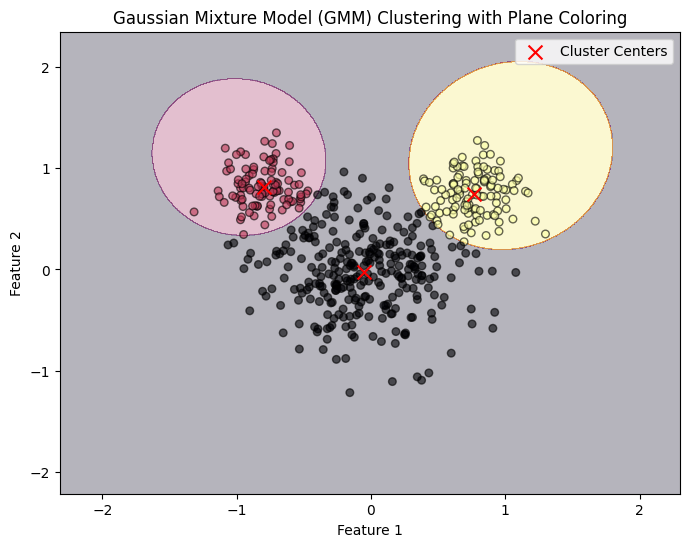

In [28]:
gmm = GaussianMixture(n_components=3, max_iter=60, random_state=0)
gmm.fit(data_X)

# Create a grid covering the plane
x = np.linspace(min(data_X[:, 0]) - 1, max(data_X[:, 0]) + 1, 1000)
y = np.linspace(min(data_X[:, 1]) - 1, max(data_X[:, 1]) + 1, 1000)
X, Y = np.meshgrid(x, y)
xy = np.vstack([X.ravel(), Y.ravel()]).T

# Predict the cluster for each point in the grid
grid_labels = gmm.predict(xy)

# Reshape the grid labels to match the grid shape
grid_labels = grid_labels.reshape(X.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(X, Y, grid_labels, alpha=0.3, cmap='inferno')
plt.scatter(data_X[:, 0], data_X[:, 1], c=gmm.predict(data_X), cmap='inferno', s=30, edgecolor='k', alpha=0.6)
plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], c='red', s=100, marker='x', label='Cluster Centers')

plt.title('Gaussian Mixture Model (GMM) Clustering with Plane Coloring')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='best')
plt.show()

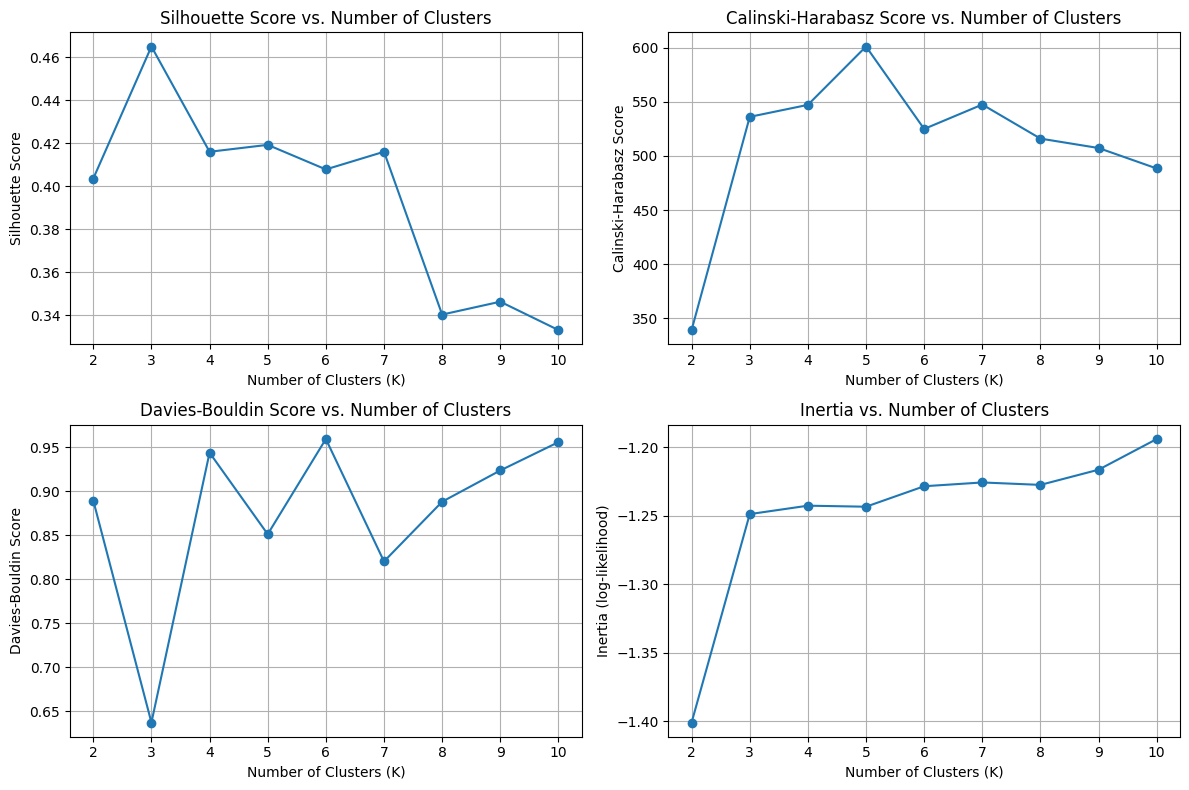

In [29]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

# Evaluation metrics
def evaluate_gmm(data_X, max_k=10):
    silhouettes = []
    calinski = []
    davies_bouldin = []
    inertia = []
    k_range = range(2, max_k + 1)  # Start from 2 clusters as 1 is trivial

    for k in k_range:
        # Fit GMM for the current number of clusters k
        gmm = GaussianMixture(n_components=k, random_state=0)
        gmm.fit(data_X)

        # Get the predicted labels
        labels = gmm.predict(data_X)

        # Compute silhouette score
        silhouettes.append(silhouette_score(data_X, labels))

        # Compute Calinski-Harabasz score
        calinski.append(calinski_harabasz_score(data_X, labels))

        # Compute Davies-Bouldin score
        davies_bouldin.append(davies_bouldin_score(data_X, labels))

        # Inertia (though not part of GMM, we can get it from GMM's score function)
        inertia.append(gmm.lower_bound_)

    # Print results for each value of K
    results = {
        'K': list(k_range),
        'Silhouette Score': silhouettes,
        'Calinski-Harabasz Score': calinski,
        'Davies-Bouldin Score': davies_bouldin,
        'Inertia': inertia
    }

    return results

# Evaluate for K in range [2, 10]
evaluation_results = evaluate_gmm(data_X, max_k=10)


# Visualization of the results


def plot_evaluation_metrics(results):
    plt.figure(figsize=(12, 8))

    # Silhouette Score (higher is better)
    plt.subplot(2, 2, 1)
    plt.plot(results['K'], results['Silhouette Score'], marker='o', label='Silhouette Score')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score vs. Number of Clusters')
    plt.grid(True)

    # Calinski-Harabasz Score (higher is better)
    plt.subplot(2, 2, 2)
    plt.plot(results['K'], results['Calinski-Harabasz Score'], marker='o', label='Calinski-Harabasz Score')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Score vs. Number of Clusters')
    plt.grid(True)

    # Davies-Bouldin Score (lower is better)
    plt.subplot(2, 2, 3)
    plt.plot(results['K'], results['Davies-Bouldin Score'], marker='o', label='Davies-Bouldin Score')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Davies-Bouldin Score')
    plt.title('Davies-Bouldin Score vs. Number of Clusters')
    plt.grid(True)

    # Inertia (lower is better)
    plt.subplot(2, 2, 4)
    plt.plot(results['K'], results['Inertia'], marker='o', label='Inertia')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia (log-likelihood)')
    plt.title('Inertia vs. Number of Clusters')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_evaluation_metrics(evaluation_results)



### Answers
1.

**How can we visualize the decision boundary for attributing a new (unlabeled) point to one of the GMM clusters?**
- plot lines separating clusters or use a color map showing each point's "most likely cluster" (imho this question was answered
right after posing it)

**Discuss any irregularities observed in the resulting plot. Provide an explanation for why they might occur.**
- there aren't really any irregularities in our plot. However in general resulting clusters might not always look nice or intuitive, because:
  - our parameter space is GMM, but the data might not actually come from different gaussian distributions
  - EM iteratively finds better and better approximations, but depending on the initial guess, it doesn't necessarily converge to a global maximum of ELBO

2.

**If we didn't know the number of clusters in advance, how could we decide on a suitable  K  for the clustering algorithm?**
- we can run the algorithm for different values of K and choose the one that maximizes (or minimizes when it's desired) some evaluation metric such as Silhouette Score, Inertia, Calinski-Harabasz Index, Davies-Bouldin Index or Dunn Index. As we can see, for our data K=3 seems to fit the best. That's not surprising since we know that the data actually comes from 3 gaussian distributions